In [3]:
import numpy as np
from tqdm.notebook import tqdm
import pylab as plt
plt.rcParams['figure.figsize'] = [8, 5]

# Monty Hall problem

In [4]:
def threedoors(which):

    labels = np.arange(3) # Labels of the three doors
    doors = np.zeros(3,dtype=int) # Content of three doors
    doors[np.random.choice(labels)] = 1 # One of them contains the prize, don't know which one
    choice = np.random.choice(labels) # I pick one door
    notchosen = np.delete(labels,choice) # These are the remaining doors 

    while True:
        opened = np.random.choice(notchosen) #One door is opened
        if doors[opened]==0: # But it's never the winning door
            other = int(np.delete(labels,[opened,choice])) # This is the other door left
            break
    
    
    if which == 'switch': # Do you switch? If yes, return content of the other door 
        return doors[other]

    elif which == 'keep': # If not, return content of the one you picked initially
        return doors[choice]
 
    elif which == 'external': # A third guy picks randomly between the two remaining doors
        picked = np.random.choice([choice,other])
        return doors[picked]
    

In [7]:
N  = int(1e5) # Do this many times
probs = {}

for which in tqdm(['switch','keep','external']):
    events = [threedoors(which) for i in tqdm(range(N))]
    probs[which] = np.sum(events)/ N


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

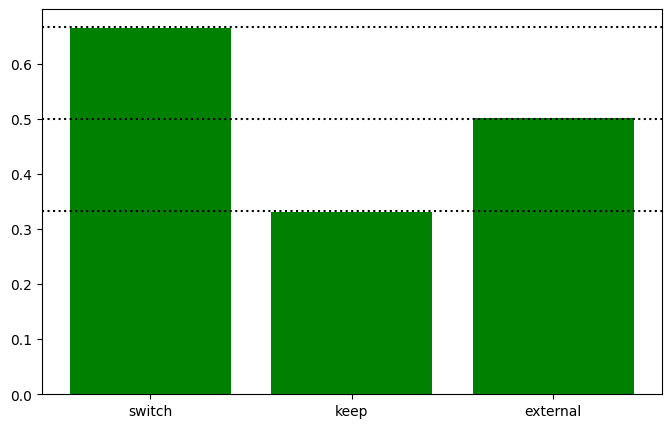

In [8]:
# A simple bar chart
plt.bar([0,1,2], [probs[k] for k in probs.keys()], color='green');
plt.xticks([0,1,2], probs.keys());

for y in [1/3,1/2,2/3]:
    plt.axhline(y, ls='dotted',c='black')

### Let's break it down:

Before a door is chosen, the probability of finding a car is clearly $1/3$.

After one door has been chosen:

* Probability of car behind **Door 1** $= 1/3$
* Probability of car behind **Doors 2 or 3** $= 2/3$

But if the host opens **Door 3** to show a goat, you now have prior information to update your probability of the car being behind **Door 2**. The probability of the car behind **Door 1** is still $1/3$, but the total probability must sum to unity, and you only have **Door 2** left. Hence,

* With prior knowledge of **Door 3** containing a goat, the probability of car behind **Door 2** $=2/3$.


So, ***switching doubles your chances***. You should always switch!! But only because you had prior information.  

If someone walked in after the "bad" door was opened, then their probability of winning is the expected 1/number_of_doors=$1/2$.

### Generalization


In the most general case, there are $N$ doors and the presenter opens $p$ of them . In this case, switching wins with probability (see [here](https://en.wikipedia.org/wiki/Monty_Hall_problem))

$$
p_{\rm switch} = \frac{1}{N} \frac{N-1}{N-p-1}
$$
which is always greater than $1/N$ (so you should always switch, no matter what). 

# [Optional] Additional exercise if you want to practice: Pdf of the log

In [25]:
x=np.random.uniform(0.1,10,10000)

In [26]:
x

array([8.86989241, 9.89007589, 0.59885342, ..., 7.09967041, 7.93802928,
       1.82487221])

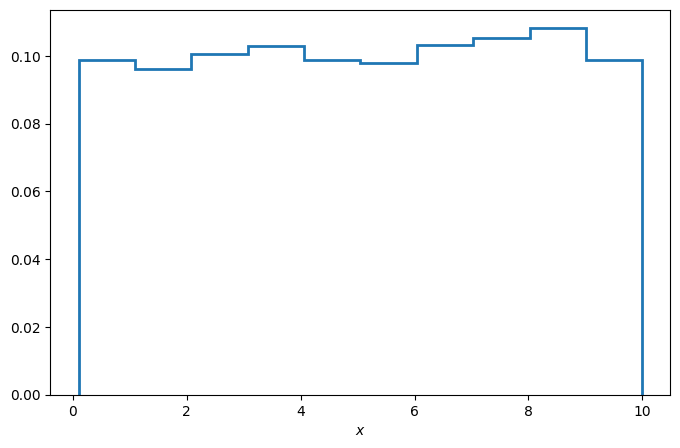

In [27]:
plt.hist(x,density=True,histtype='step',lw=2);
plt.xlabel("$x$");

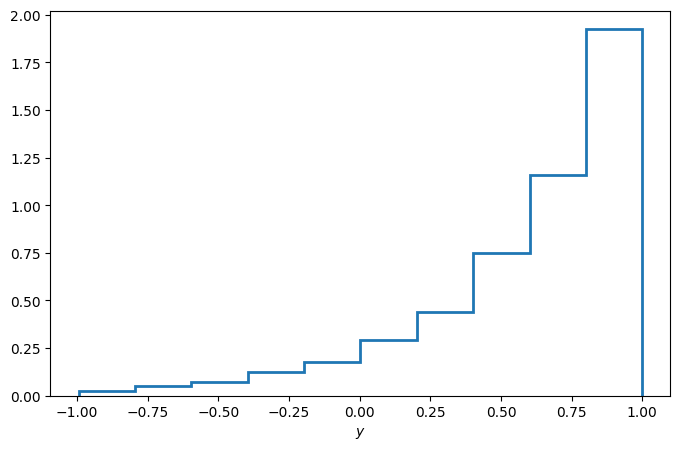

In [28]:
y=np.log10(x)
plt.hist(y,density=True,histtype='step',lw=2);
plt.xlabel("$y$");

Compute the pdf

$y=\log_{10} x$

$x=10^y$

$\frac{dx}{dy} = 10^y \log(10)$

Uniform in x:
$p(x) = \frac{1}{10-0.1}$


Therefore $p(y) =10^y \log(10) /(10-0.1)$


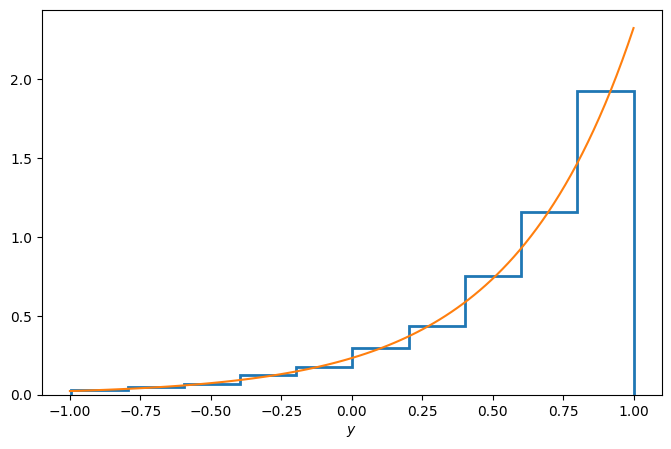

In [29]:
ygrid=np.linspace(-1,1,100)
pofy = 10**ygrid *np.log(10)/(10-0.1)

plt.hist(y,density=True,histtype='step',lw=2);
plt.plot(ygrid,pofy);
plt.xlabel("$y$");


In [30]:
# This changes..
np.log10(np.mean(x)), np.mean(y)

(0.7078960196806466, 0.5924693667895362)

In [31]:
# But this doesn't!
np.log10(np.median(x)), np.median(y)

(0.7102069431922386, 0.7102069431903905)